In [34]:
import ROOT
import math
# Colors
from ROOT import kYellow, kBlue, kRed, kGreen

In [35]:
def getTHLimits(files, ttree, var):
    g_min = 99999999999.
    g_max = -99999999999.
    for f in files:
        aux = ROOT.TFile.Open(f)
        tree = aux.Get(ttree)
        maxv=int(round(tree.GetMaximum(var)))
        minv=int(round(tree.GetMinimum(var)))
        if(minv < g_min):
            g_min = minv
        if(maxv > g_max):
            g_max = maxv
        return g_min-2.,g_max+2.

In [36]:
def genHist(filename, ttree, var, hmin, hmax, signal=False):
    # To do: Check if var is vector or not
    # Open file .root
    file = ROOT.TFile.Open(filename)
    # Select tree. Usually we'll use "Nominal"
    tree = file.Get(ttree)
    # Create empty histogram hist
    hist = ROOT.TH1F("h",var,100,hmin,hmax) # (minv-1,maxv+1) range of the histogram
    # For each row in the tree, 
    for entry in tree:
        # we'll select the value in the var column
        event = getattr(entry,var)
        # and fill the histogram with it
        hist.Fill(event)
    # Set the histogram memory direction
    hist.SetDirectory(0)        
    ROOT.TH1F.AddDirectory(False)
    return hist

In [37]:
ttree = "Nominal"
var = "m_DTphi"
files = ["ttbar-all.root", "Wtaunu_221-all.root", "WW_Pw-all.root"] 
#files = ["ZtautauB_221.root", "ZtautauC_221.root", "ZtautauL_221.root"]

# Stacked histogram object
hs = ROOT.THStack("hs"," stacked histograms")
# colors must be bigger or size equal to the files list.
colors = [kYellow, kBlue, kRed, kGreen]
hmin, hmax = getTHLimits(files, ttree, var)
print(hmin, hmax)
hists = []

# Get stacked histogram of var for each file. 
for i in range(len(files)):
    hist = genHist(files[i], ttree, var, hmin, hmax)
    hist.SetFillColor(colors[i])
    #hist.GetXaxis().SetLimits(-3,3)
    #hist.GetYaxis().SetLimits(0, 30)
    hists.append(hist)
    hs.Add(hist)
    

-5.0 5.0


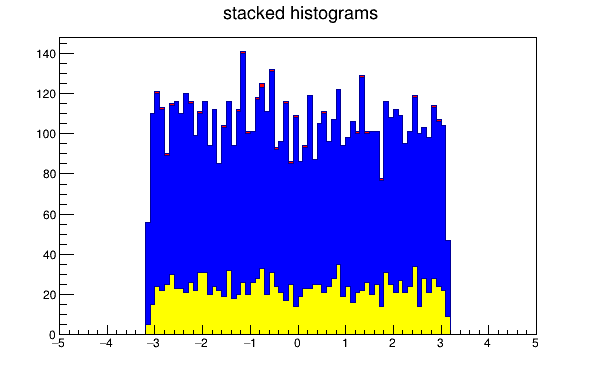

In [5]:
# Plot histogram
c = ROOT.TCanvas("Canvas",var,600,400)
hs.Draw()
#hs.GetXaxis().SetRangeUser(-3.5,3.5)
#hs.GetYaxis().SetRangeUser(0,90)
c.Draw()

Automatically created module for IPython interactive environment


INFO:rootpy.plotting.style] using ROOT style 'ATLAS'
INFO:rootpy.plotting.style] using matplotlib style 'ATLAS'


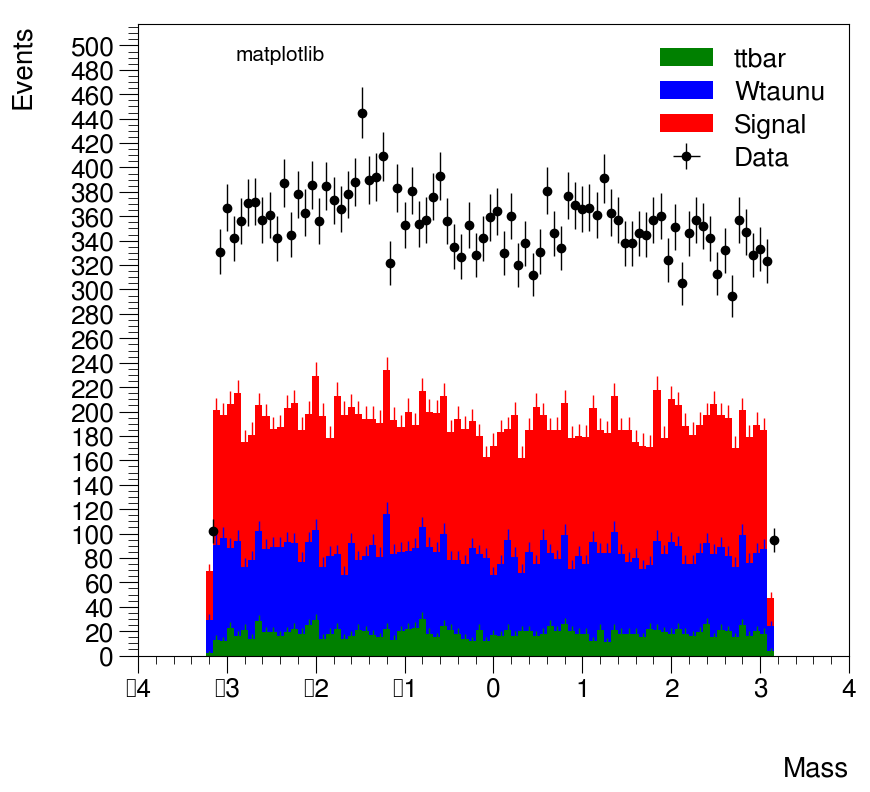

In [77]:
print(__doc__)
import numpy as np
from rootpy.plotting import Hist, HistStack, Legend, Canvas, set_style
from rootpy.plotting.style import get_style, set_style
from rootpy.plotting.utils import draw
from rootpy.interactive import wait
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from root_numpy import root2array, tree2array
from root_numpy import testdata, fill_hist
import numpy as np
import pandas as pd


filesB = ["ttbar-all.root", "Wtaunu_221-all.root", "WW_Pw-all.root"] 
filesS = ["Xtohh1000-all.root"]
filesD = ["data17-all.root"]
arrB = []
arrS = []
arrD = []

for f in filesB:
    rfile = ROOT.TFile(f)
    intree = rfile.Get('Nominal')
    array = tree2array(intree)
    df = pd.DataFrame(array)
    arrB.append(df)
for f in filesS:
    rfile = ROOT.TFile(f)
    intree = rfile.Get('Nominal')
    array = tree2array(intree)
    df = pd.DataFrame(array)
    arrS.append(df)
for f in filesD:
    rfile = ROOT.TFile(f)
    intree = rfile.Get('Nominal')
    array = tree2array(intree)
    df = pd.DataFrame(array)
    arrD.append(df)
    
# set the style
style = get_style('ATLAS')
style.SetEndErrorSize(3)
set_style(style)

# create histograms
h1 = Hist(100, -4., 4., title='ttbar', markersize=0, legendstyle='F')
h2 = h1.Clone(title='Wtaunu')
h3 = h1.Clone(title='Signal')
h4 = h1.Clone(title='Data', drawstyle='E1 X0', legendstyle='LEP') # Esto está chueco
h4.markersize = 1.2

# fill the histograms with our distributions
fill_hist(h1, arrB[0].loc[:,'m_DTphi'])
fill_hist(h2, arrB[1].loc[:,'m_DTphi'])
fill_hist(h3, arrS[0].loc[:,'m_DTphi'])
fill_hist(h4, arrD[0].loc[:,'m_DTphi'])

# set visual attributes
h1.fillstyle = 'solid'
h1.fillcolor = 'green'
h1.linecolor = 'green'
h1.linewidth = 0

h2.fillstyle = 'solid'
h2.fillcolor = 'blue'
h2.linecolor = 'blue'
h2.linewidth = 0

h3.fillstyle = 'solid'
h3.fillcolor = 'red'
h3.linecolor = 'red'
h3.linewidth = 0

stack = HistStack([h1, h2, h3], drawstyle='HIST E1 X0')

# plot with ROOT
canvas = Canvas(width=1000, height=800)
draw([stack, h4], xtitle='Mass', ytitle='Events', pad=canvas)
# set the number of expected legend entries
legend = Legend([h1, h2, h3], leftmargin=0.25, margin=0.1)
legend.Draw()
label = ROOT.TText(0.2, 0.6, 'ROOT')
label.SetTextFont(43)
label.SetTextSize(15)
label.SetNDC()
label.Draw()
canvas.Modified()
canvas.Update()

# plot with matplotlib
set_style('ATLAS', mpl=True)
fig = plt.figure(figsize=(9, 8), dpi=100)
axes = plt.axes()
axes.xaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_major_locator(MultipleLocator(20))
rplt.bar(stack, stacked=True, axes=axes)
rplt.errorbar(h4, xerr=False, emptybins=False, axes=axes)
plt.xlabel('Mass', position=(1., 0.), va='bottom', ha='right')
plt.ylabel('Events', position=(0., 1.), va='top', ha='right')
axes.xaxis.set_label_coords(1., -0.20)
axes.yaxis.set_label_coords(-0.18, 1.)
leg = plt.legend()
axes.text(0.2, 0.95, 'matplotlib',
          verticalalignment='center', horizontalalignment='center',
          transform=axes.transAxes, fontsize=15)

if not ROOT.gROOT.IsBatch():
    plt.show()
    # wait for you to close the ROOT canvas before exiting
    wait(True)